
ШАГ 1: ИМПОРТ БИБЛИОТЕК И ЧТЕНИЕ ДАННЫХ
Колонки с утечкой данных, которые будут удалены:
УДАЛЕНО: reservation_status
УДАЛЕНО: reservation_status_date
УДАЛЕНО: assigned_room_type
УДАЛЕНО: days_in_waiting_list
Размер датасета до очистки: (119390, 32)
Размер датасета после очистки: (119390, 28)

ШАГ 2: РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)
=== ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ ===
Размер датасета: (119390, 28)

Первые 5 строк:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27          

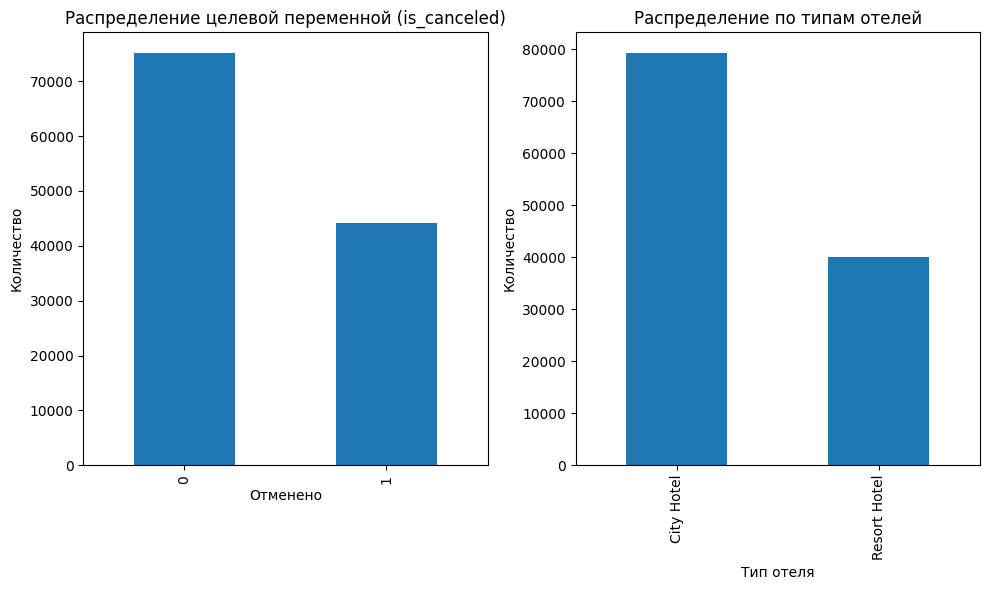

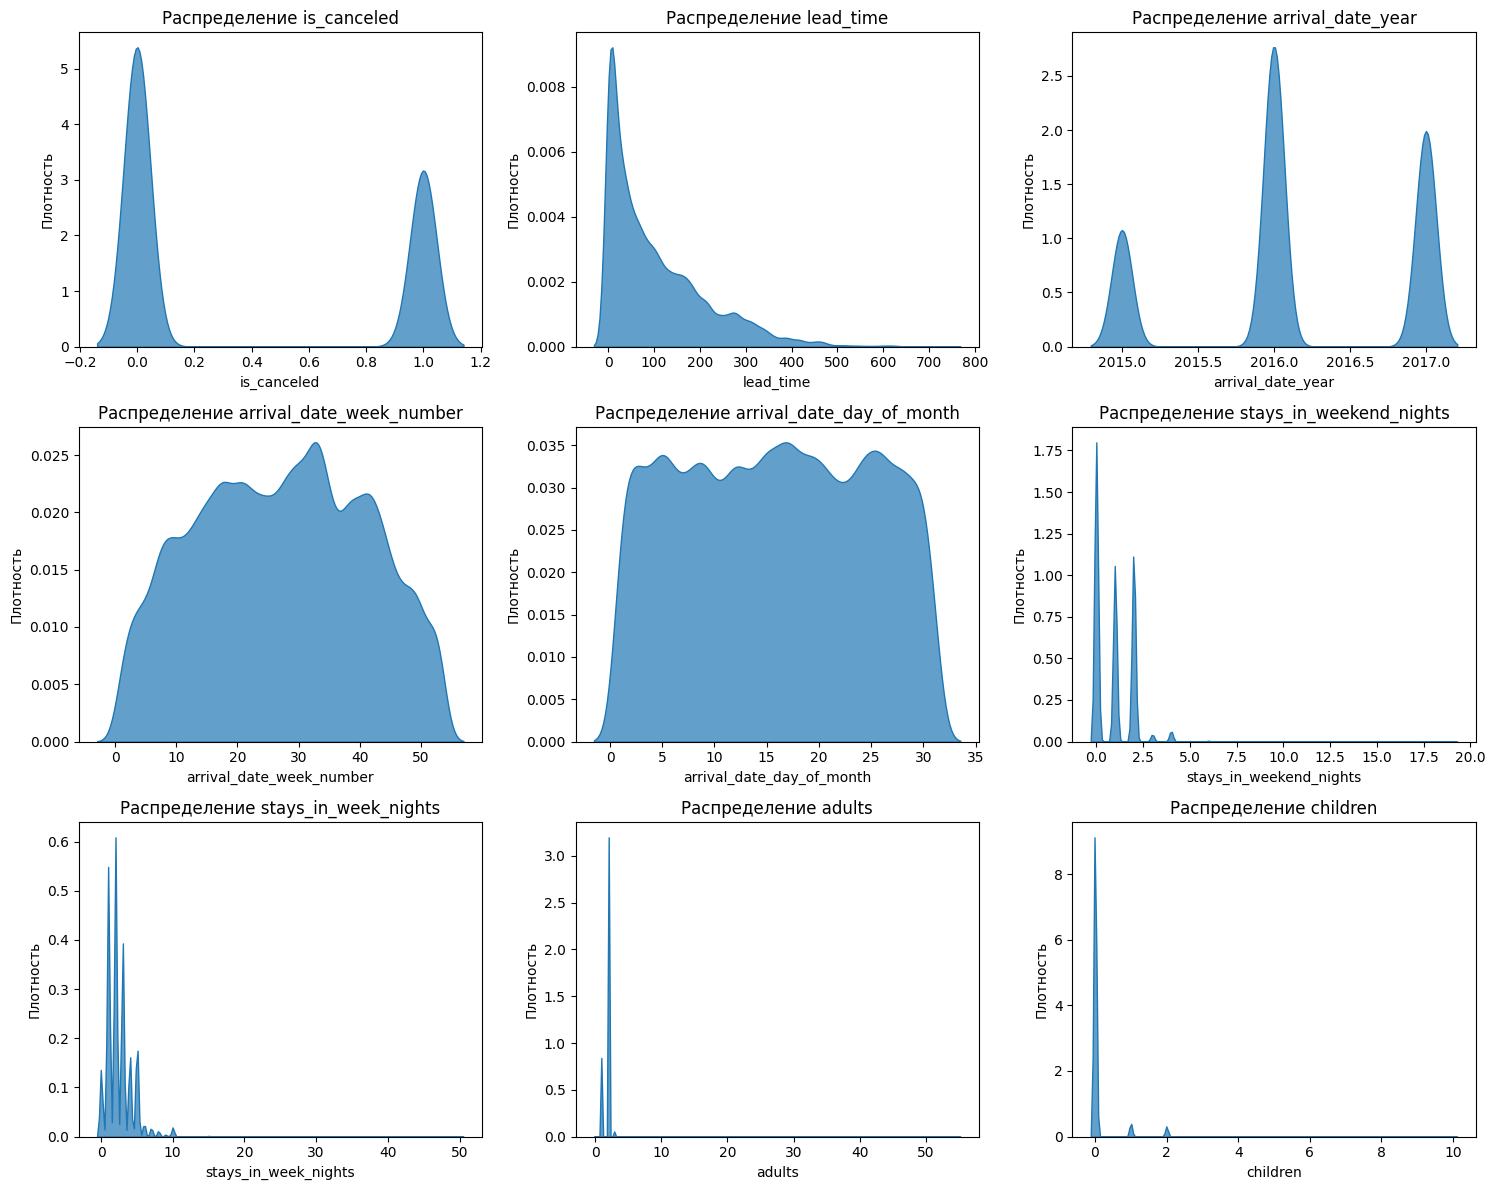

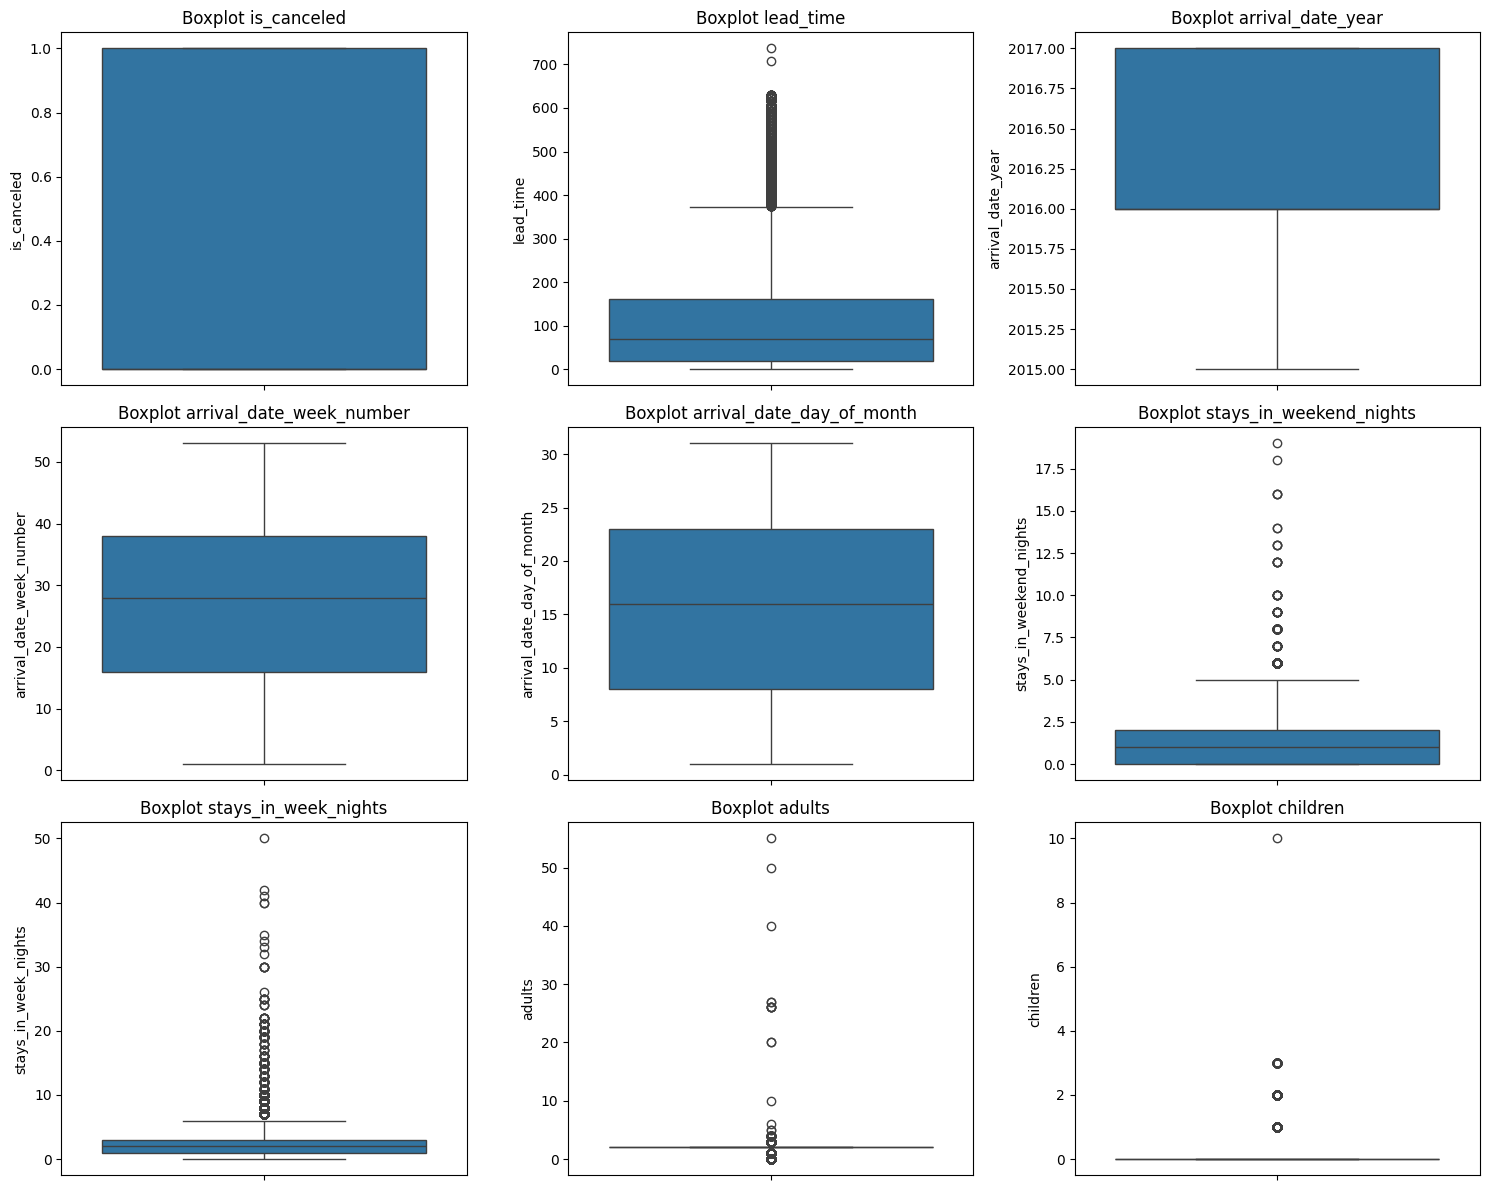


=== ПОЛНАЯ МАТРИЦА КОРРЕЛЯЦИИ ===


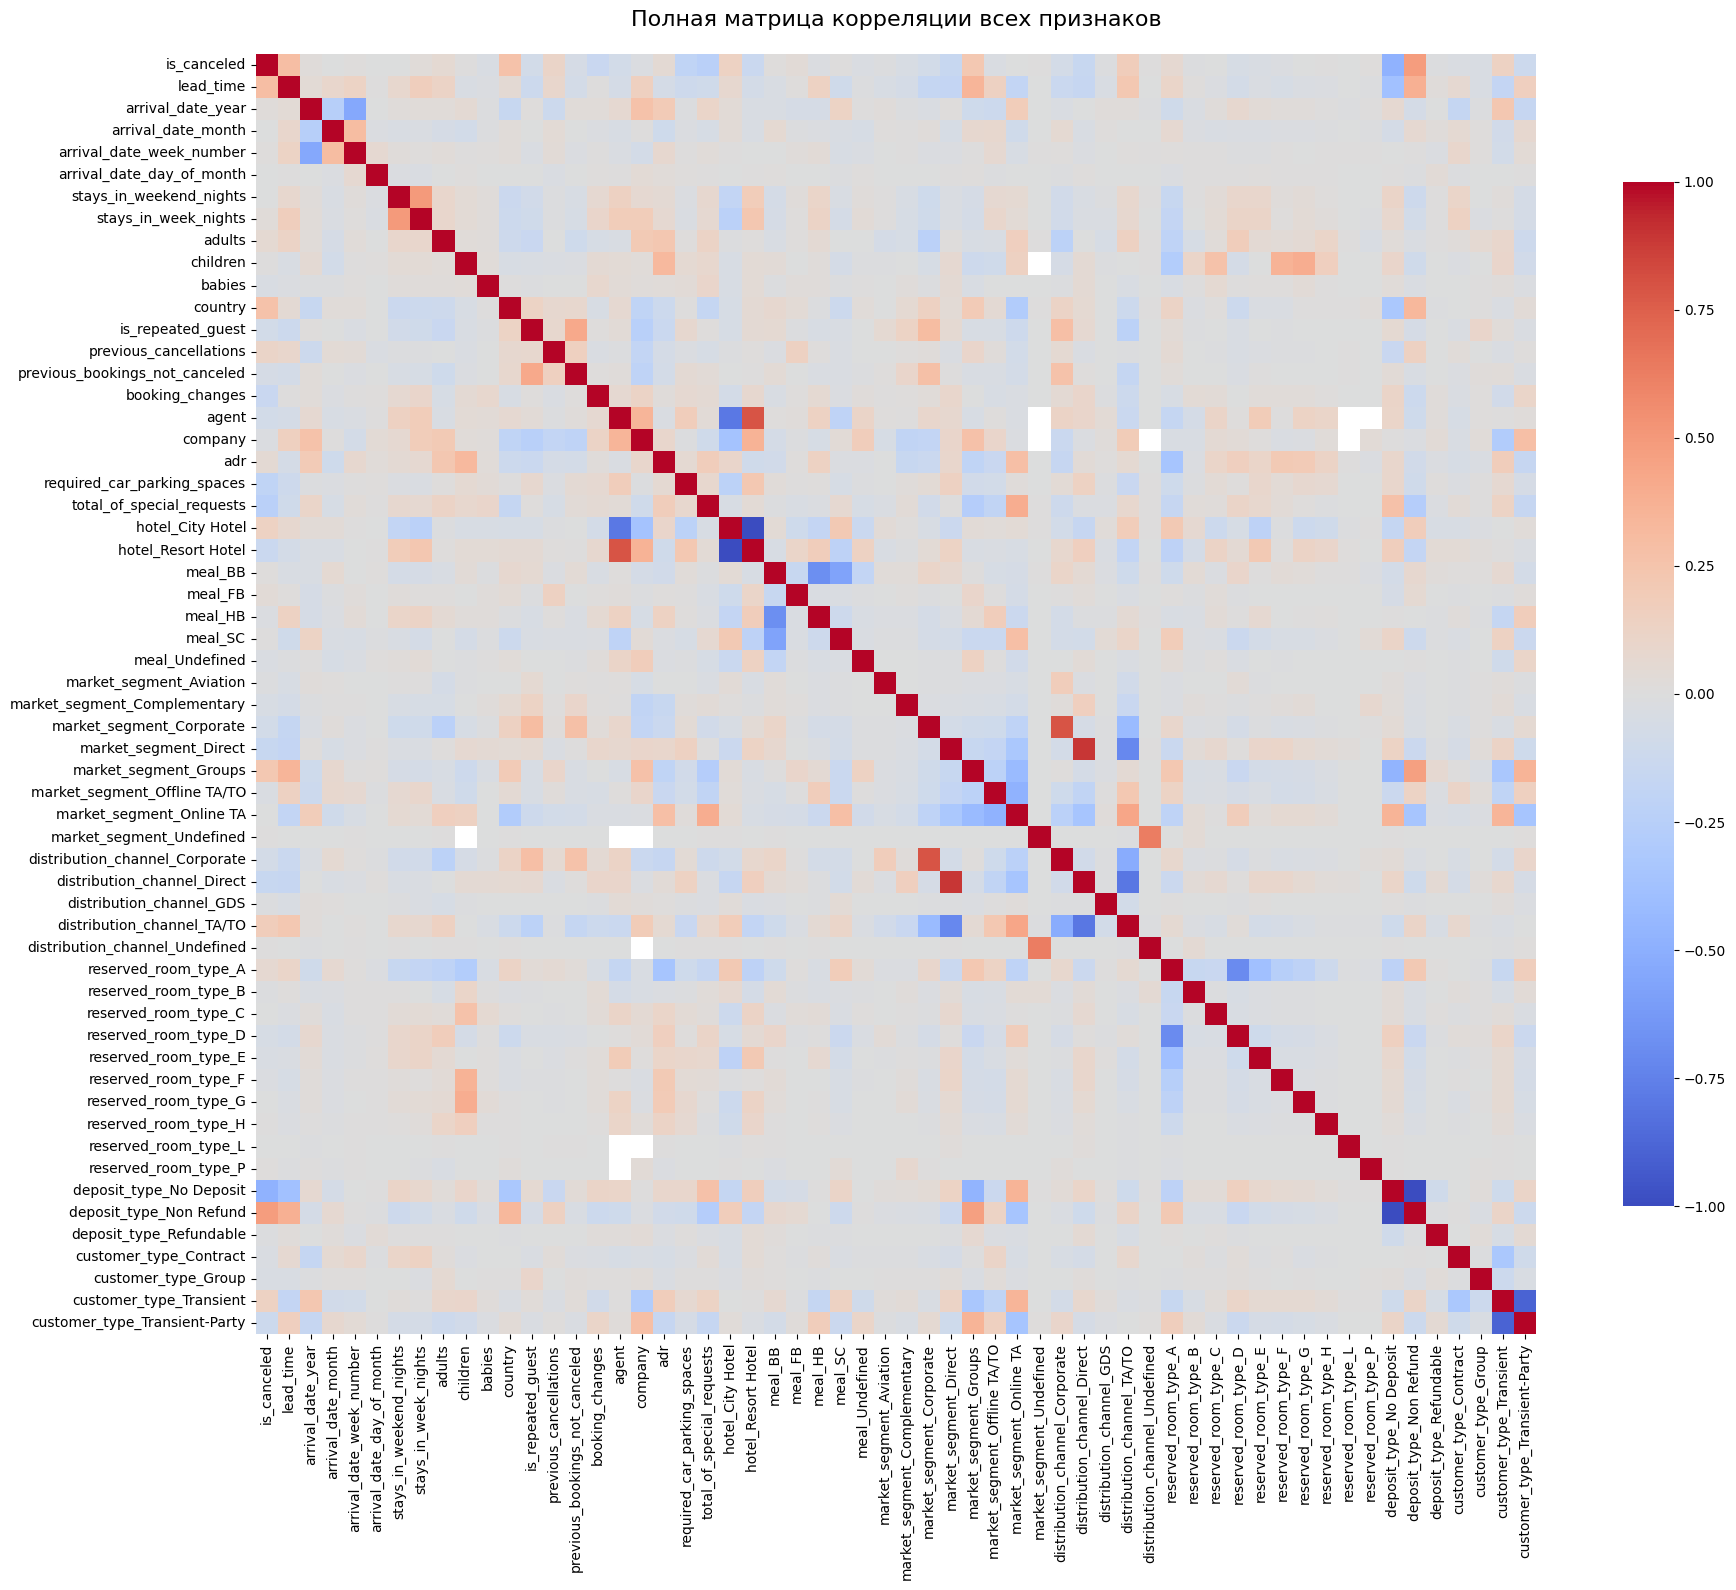

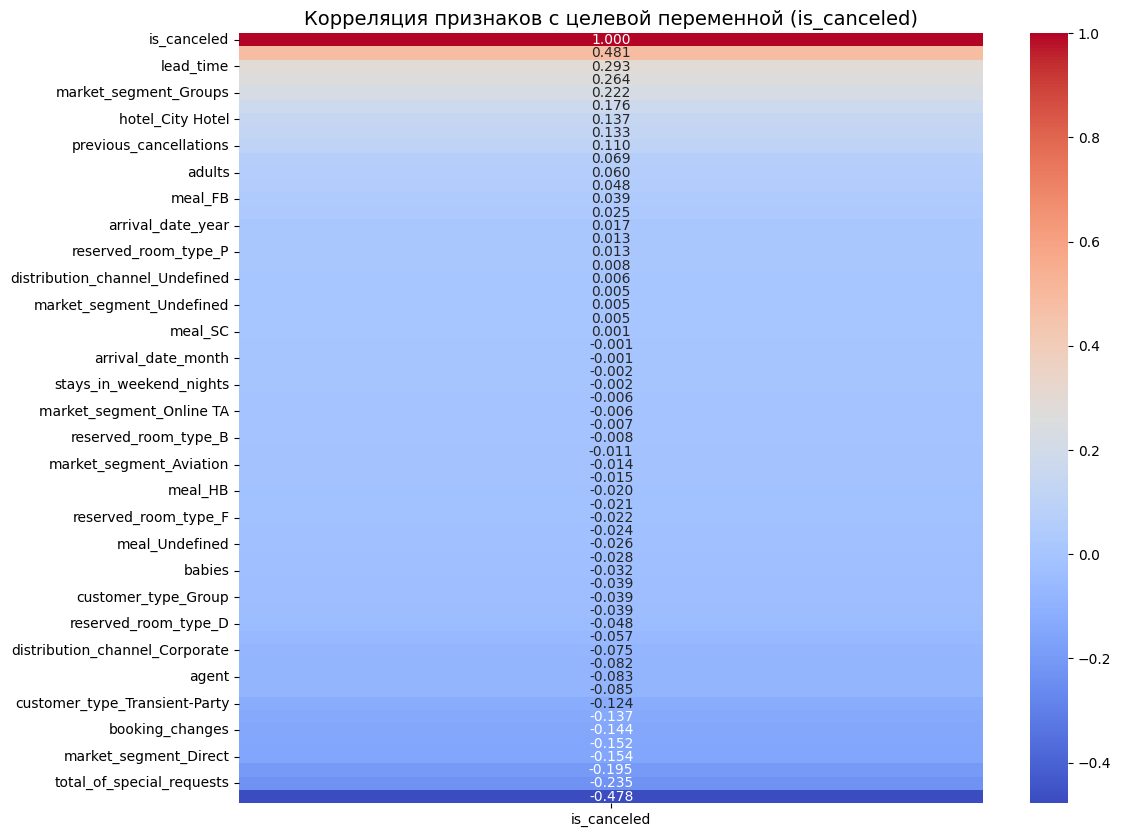

Признаки с наибольшей корреляцией с целевой переменной:
deposit_type_Non Refund       0.481457
lead_time                     0.293123
country                       0.264223
market_segment_Groups         0.221859
distribution_channel_TA/TO    0.175944
hotel_City Hotel              0.136531
customer_type_Transient       0.133084
previous_cancellations        0.110133
reserved_room_type_A          0.068643
adults                        0.060017
adr                           0.047557
meal_FB                       0.038828
stays_in_week_nights          0.024765
arrival_date_year             0.016660
meal_BB                       0.013124
Name: is_canceled, dtype: float64


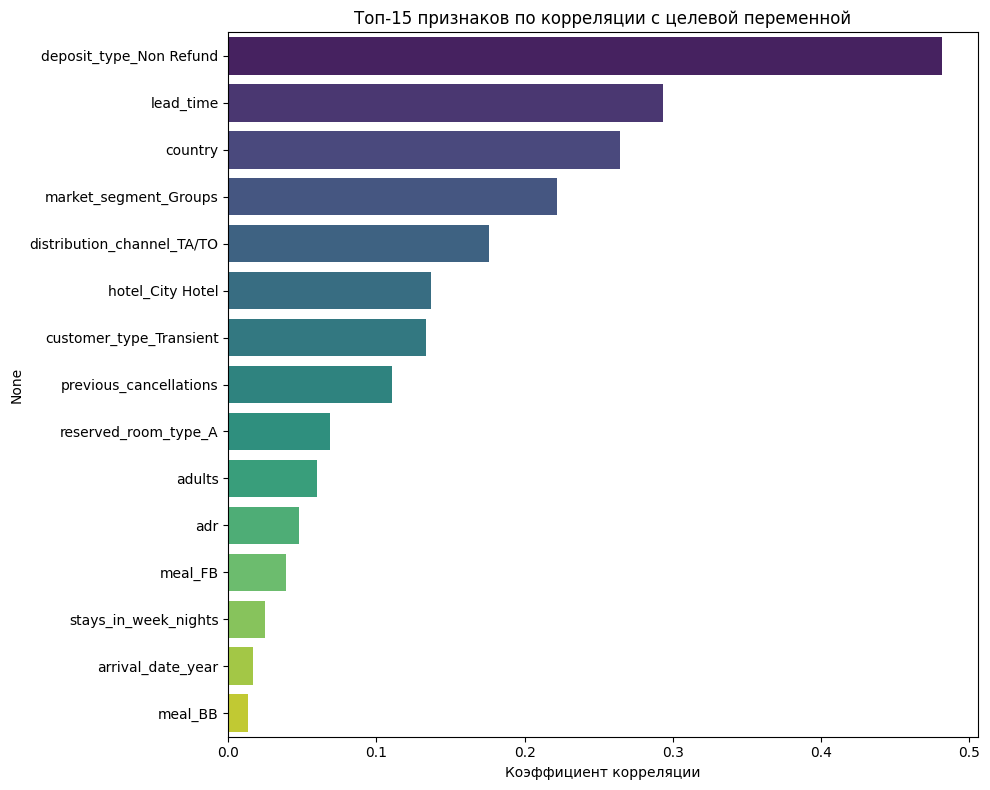


ШАГ 3: ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
Пропущенные значения до обработки:
company                           112593
agent                              16340
country                              488
children                               4
arrival_date_year                      0
arrival_date_month                     0
arrival_date_day_of_month              0
arrival_date_week_number               0
stays_in_weekend_nights                0
hotel                                  0
lead_time                              0
is_canceled                            0
babies                                 0
adults                                 0
stays_in_week_nights                   0
meal                                   0
is_repeated_guest                      0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
reserved_room_type                     0
previous_bookings_not_canceled         0
deposit_type            

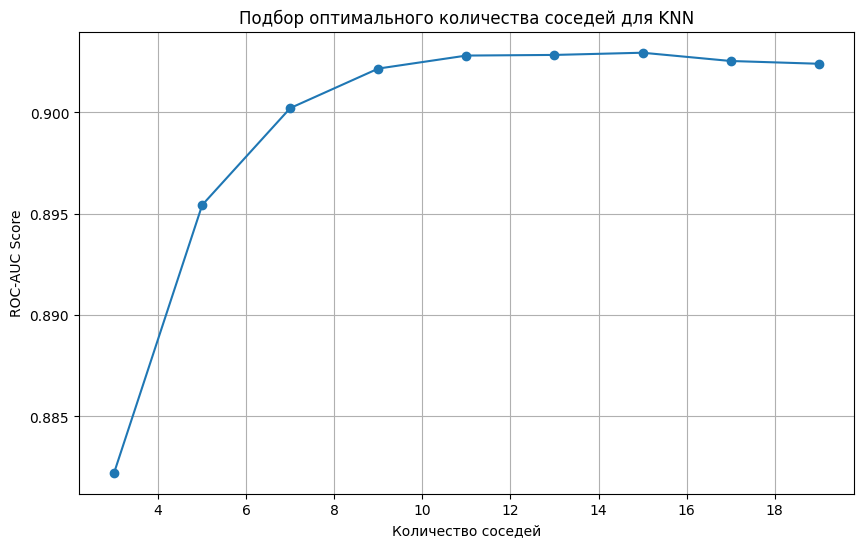


ШАГ 9: ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ KNN
=== ЛУЧШАЯ KNN МОДЕЛЬ ===
Обучающая выборка - Accuracy: 0.8589
Тестовая выборка - Accuracy: 0.8374
ROC-AUC: 0.9084

Classification Report для тестовой выборки:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15033
           1       0.81      0.73      0.77      8845

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.82     23878
weighted avg       0.84      0.84      0.84     23878


ШАГ 10: СРАВНЕНИЕ С ДРУГИМИ КЛАССИФИКАТОРАМИ

=== Logistic Regression ===
Accuracy: 0.8061
ROC-AUC: 0.8896
Время обучения: 8.79 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     15033
           1       0.73      0.76      0.74      8845

    accuracy                           0.81     23878
   macro avg       0.79      0.80      0.79     23878
weighted avg       0.81      0.81      0.81     238

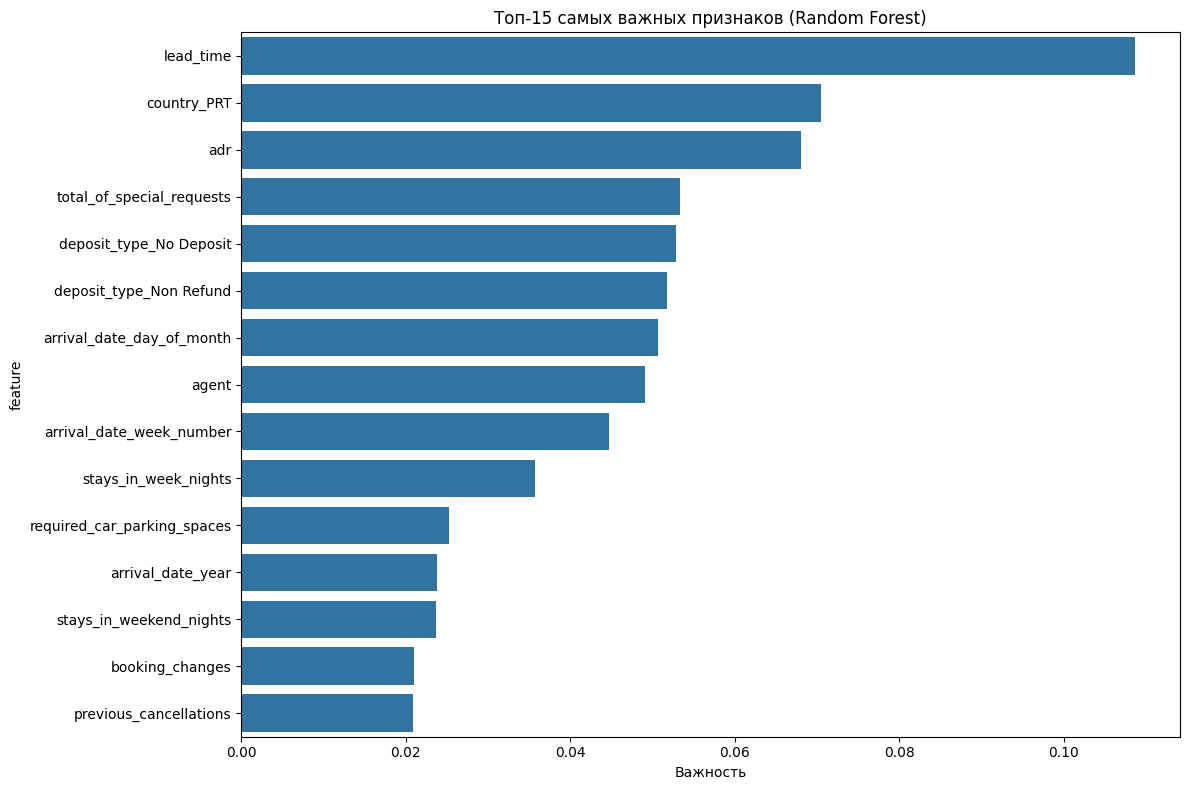


Матрица ошибок для лучшей модели:


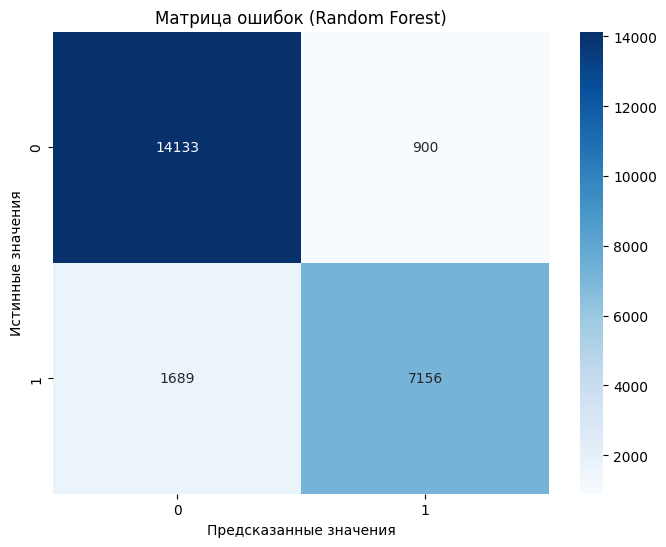

In [1]:
# Шаг 0: Описание задачи
"""
Задача: Предсказать, будет ли бронирование отеля отменено (is_canceled = 1) или нет (is_canceled = 0)

Это задача бинарной классификации, где мы пытаемся предсказать вероятность отмены бронирования
на основе различных характеристик бронирования и гостя.

Практическая значимость: Помочь отелям оптимизировать управление бронированиями,
улучшить прогнозирование загрузки и минимизировать финансовые потери от отмен.
"""

# Шаг 1: Импорт библиотек и чтение данных
print("\n" + "="*50)
print("ШАГ 1: ИМПОРТ БИБЛИОТЕК И ЧТЕНИЕ ДАННЫХ")
print("="*50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings

warnings.filterwarnings('ignore')

# Чтение данных
df = pd.read_csv('hotel_bookings.csv')

# Удаление колонок с утечкой данных
leakage_columns = [
    'reservation_status', 'reservation_status_date',
    'assigned_room_type', 'days_in_waiting_list'
]

print("Колонки с утечкой данных, которые будут удалены:")
for col in leakage_columns:
    if col in df.columns:
        print(f"УДАЛЕНО: {col}")

df_clean = df.drop(columns=leakage_columns, errors='ignore')
print(f"Размер датасета до очистки: {df.shape}")
print(f"Размер датасета после очистки: {df_clean.shape}")

# Шаг 2: Разведочный анализ данных (EDA)
print("\n" + "="*50)
print("ШАГ 2: РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)")
print("="*50)

print("=== ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ ===")
print(f"Размер датасета: {df_clean.shape}")
print("\nПервые 5 строк:")
print(df_clean.head())

print("\nИнформация о типах данных:")
print(df_clean.info())

print("\nОписательная статистика числовых признаков:")
print(df_clean.describe())

print("\nПроверка целевой переменной:")
print(df_clean['is_canceled'].value_counts())
print(f"Доля отмененных бронирований: {df_clean['is_canceled'].mean():.2%}")

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df_clean['is_canceled'].value_counts().plot(kind='bar')
plt.title('Распределение целевой переменной (is_canceled)')
plt.xlabel('Отменено')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
df_clean['hotel'].value_counts().plot(kind='bar')
plt.title('Распределение по типам отелей')
plt.xlabel('Тип отеля')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# Визуализация числовых признаков
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

# Графики распределения (плотность вероятности)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_clean, x=col, fill=True, alpha=0.7)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
plt.tight_layout()
plt.show()

# Boxplot для выявления выбросов
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_clean, y=col)
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Полная матрица корреляции
print("\n=== ПОЛНАЯ МАТРИЦА КОРРЕЛЯЦИИ ===")

# Создаем копию для корреляционного анализа
df_corr = df_clean.copy()
categorical_cols_corr = df_corr.select_dtypes(include=['object']).columns

# Быстрое кодирование для корреляционного анализа
for col in categorical_cols_corr:
    if df_corr[col].nunique() <= 10:
        dummies = pd.get_dummies(df_corr[col], prefix=col)
        df_corr = pd.concat([df_corr, dummies], axis=1)
        df_corr = df_corr.drop(col, axis=1)
    else:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Вычисляем полную матрицу корреляции
full_correlation_matrix = df_corr.corr()

# Визуализация полной матрицы корреляции
plt.figure(figsize=(20, 16))
sns.heatmap(full_correlation_matrix, 
            annot=False,
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Полная матрица корреляции всех признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Детальная визуализация корреляции с целевой переменной
plt.figure(figsize=(12, 10))
target_correlation = full_correlation_matrix[['is_canceled']].sort_values('is_canceled', ascending=False)
sns.heatmap(target_correlation, 
            annot=True, 
            cmap='coolwarm',
            fmt='.3f')
plt.title('Корреляция признаков с целевой переменной (is_canceled)', fontsize=14)
plt.show()

# Анализ важных признаков
print("Признаки с наибольшей корреляцией с целевой переменной:")
top_correlations = full_correlation_matrix['is_canceled'].sort_values(ascending=False)
print(top_correlations[1:16])

# Визуализация топ коррелированных признаков
plt.figure(figsize=(10, 8))
top_15 = top_correlations[1:16]
sns.barplot(x=top_15.values, y=top_15.index, palette='viridis')
plt.title('Топ-15 признаков по корреляции с целевой переменной')
plt.xlabel('Коэффициент корреляции')
plt.tight_layout()
plt.show()

# Шаг 3: Обработка пропущенных значений
print("\n" + "="*50)
print("ШАГ 3: ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
print("="*50)

print("Пропущенные значения до обработки:")
print(df_clean.isnull().sum().sort_values(ascending=False))

# Заполнение пропущенных значений МЕДИАНОЙ для числовых колонок
numerical_columns = df_clean.select_dtypes(include=[np.number]).columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns

print("\nЗаполнение числовых колонок медианой:")
for col in numerical_columns:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)
        print(f"Колонка {col}: заполнена медианой {median_value}")

# Заполнение категориальных колонок модой
print("\nЗаполнение категориальных колонок модой:")
for col in categorical_columns:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        df_clean[col] = df_clean[col].fillna(mode_value)
        print(f"Колонка {col}: заполнена значением '{mode_value}'")

print(f"\nРазмер датасета после обработки пропусков: {df_clean.shape}")
print("Пропущенные значения после обработки:")
print(df_clean.isnull().sum().sum())

# Шаг 4: Обработка категориальных признаков
print("\n" + "="*50)
print("ШАГ 4: ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*50)

# Определение числовых и категориальных признаков для пайплайна
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.drop('is_canceled').tolist()
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Числовые признаки ({len(numerical_features)}): {numerical_features}")
print(f"Категориальные признаки ({len(categorical_features)}): {categorical_features}")

# Создание препроцессора (будет использоваться в пайплайнах)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

print("Создан препроцессор для пайплайна")

# Шаг 5: Нормализация данных
print("\n" + "="*50)
print("ШАГ 5: НОРМАЛИЗАЦИЯ ДАННЫХ")
print("="*50)

print("Нормализация нужна для алгоритмов, чувствительных к масштабу (KNN, SVM)")
print("Нормализация будет выполнена внутри пайплайна с помощью StandardScaler")

# Шаг 6: Разбиение на обучающую и тестовую выборки
print("\n" + "="*50)
print("ШАГ 6: РАЗБИЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ")
print("="*50)

X = df_clean.drop('is_canceled', axis=1)
y = df_clean['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"Доля отмен в обучающей выборке: {y_train.mean():.2%}")

# Шаг 7: Запуск KNN классификатора
print("\n" + "="*50)
print("ШАГ 7: ЗАПУСК KNN КЛАССИФИКАТОРА")
print("="*50)

print("Выбор KNN обоснован тем, что это простой интерпретируемый алгоритм,")
print("хорошо работающий на нормализованных данных")

knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)
y_proba_knn = knn_pipe.predict_proba(X_test)[:, 1]

print("=== KNN КЛАССИФИКАТОР ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_knn):.4f}")

# Шаг 8: Подбор оптимального количества соседей
print("\n" + "="*50)
print("ШАГ 8: ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА СОСЕДЕЙ")
print("="*50)

param_grid = {'knn__n_neighbors': range(3, 21, 2)}
knn_grid = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(f"Лучший параметр: {knn_grid.best_params_}")
print(f"Лучший ROC-AUC: {knn_grid.best_score_:.4f}")

# Визуализация подбора параметра
plt.figure(figsize=(10, 6))
results = knn_grid.cv_results_
plt.plot(param_grid['knn__n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Количество соседей')
plt.ylabel('ROC-AUC Score')
plt.title('Подбор оптимального количества соседей для KNN')
plt.grid(True)
plt.show()

# Шаг 9: Оценка лучшей модели KNN
print("\n" + "="*50)
print("ШАГ 9: ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ KNN")
print("="*50)

best_knn = knn_grid.best_estimator_
y_train_pred_knn = best_knn.predict(X_train)
y_test_pred_knn = best_knn.predict(X_test)

print("=== ЛУЧШАЯ KNN МОДЕЛЬ ===")
print(f"Обучающая выборка - Accuracy: {accuracy_score(y_train, y_train_pred_knn):.4f}")
print(f"Тестовая выборка - Accuracy: {accuracy_score(y_test, y_test_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]):.4f}")

print("\nClassification Report для тестовой выборки:")
print(classification_report(y_test, y_test_pred_knn))

# Шаг 10: Запуск других классификаторов
print("\n" + "="*50)
print("ШАГ 10: СРАВНЕНИЕ С ДРУГИМИ КЛАССИФИКАТОРАМИ")
print("="*50)

# Функция для оценки моделей
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"\n=== {model_name} ===")
    start_time = pd.Timestamp.now()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    train_time = (pd.Timestamp.now() - start_time).total_seconds()
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Время обучения: {train_time:.2f} сек")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return {'accuracy': accuracy, 'roc_auc': roc_auc, 'model': model}

# Создание и оценка моделей с пайплайнами
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(n_estimators=150, class_weight='balanced', 
                                    random_state=42, n_jobs=-1))
    ])
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, name, X_train, X_test, y_train, y_test)

# Добавляем KNN в результаты
results['KNN'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_knn),
    'roc_auc': roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]),
    'model': best_knn
}

# Сравнение моделей
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'ROC-AUC': [results[model]['roc_auc'] for model in results]
})

print("\n=== ИТОГОВОЕ СРАВНЕНИЕ МОДЕЛЕЙ ===")
print(comparison_df.sort_values('ROC-AUC', ascending=False))

# Шаг 11: Борьба с несбалансированностью классов
print("\n" + "="*50)
print("ШАГ 11: БОРЬБА С НЕСБАЛАНСИРОВАННОСТЬЮ КЛАССОВ")
print("="*50)

print(f"Распределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"Доля положительного класса: {y_train.mean():.2%}")

# Применение SMOTE в пайплайне
print("\n=== ПРИМЕНЕНИЕ SMOTE ===")

smote_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
])

smote_pipe.fit(X_train, y_train)
y_pred_smote = smote_pipe.predict(X_test)
y_proba_smote = smote_pipe.predict_proba(X_test)[:, 1]

print("Random Forest + SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_smote):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

# Сравнение с обычным Random Forest
rf_original_acc = results['Random Forest']['accuracy']
rf_original_auc = results['Random Forest']['roc_auc']
rf_smote_acc = accuracy_score(y_test, y_pred_smote)
rf_smote_auc = roc_auc_score(y_test, y_proba_smote)

print(f"\nСравнение Random Forest до и после SMOTE:")
print(f"Accuracy: {rf_original_acc:.4f} -> {rf_smote_acc:.4f} ({'+' if rf_smote_acc > rf_original_acc else ''}{rf_smote_acc - rf_original_acc:.4f})")
print(f"ROC-AUC:  {rf_original_auc:.4f} -> {rf_smote_auc:.4f} ({'+' if rf_smote_auc > rf_original_auc else ''}{rf_smote_auc - rf_original_auc:.4f})")

# Шаг 12: Исключение коррелированных переменных
print("\n" + "="*50)
print("ШАГ 12: ИСКЛЮЧЕНИЕ КОРРЕЛИРОВАННЫХ ПЕРЕМЕННЫХ")
print("="*50)

print("Зачем исключать коррелированные переменные:")
print("1. Уменьшение мультиколлинеарности")
print("2. Улучшение интерпретируемости модели") 
print("3. Сокращение времени обучения")
print("4. Уменьшение переобучения")

# Анализ корреляции между признаками
print("\nАнализ сильно коррелированных пар признаков (|corr| > 0.8):")

# Используем ранее созданную матрицу корреляции
high_corr_pairs = []
for i in range(len(full_correlation_matrix.columns)):
    for j in range(i + 1, len(full_correlation_matrix.columns)):
        if abs(full_correlation_matrix.iloc[i, j]) > 0.8:
            col1 = full_correlation_matrix.columns[i]
            col2 = full_correlation_matrix.columns[j]
            # Проверяем, что оба признака существуют в исходных данных
            if col1 in df_clean.columns or any(col1.startswith(f"{cat}_") for cat in categorical_features):
                if col2 in df_clean.columns or any(col2.startswith(f"{cat}_") for cat in categorical_features):
                    high_corr_pairs.append((
                        col1,
                        col2,
                        full_correlation_matrix.iloc[i, j]
                    ))

print(f"Найдено {len(high_corr_pairs)} сильно коррелированных пар")

if high_corr_pairs:
    print("Сильно коррелированные пары:")
    for pair in high_corr_pairs[:10]:  # Показываем первые 10
        print(f"  {pair[0]} - {pair[1]}: {pair[2]:.4f}")
else:
    print("Сильно коррелированных пар не найдено")

# Шаг 13: Общие выводы
print("\n" + "="*50)
print("ШАГ 13: ОБЩИЕ ВЫВОДЫ")
print("="*50)

# Находим лучшую модель
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_accuracy = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Accuracy']
best_roc_auc = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'ROC-AUC']

print(f"""
1. КАЧЕСТВО МОДЕЛЕЙ:
   - Лучшая модель: {best_model_name} (ROC-AUC: {best_roc_auc:.4f}, Accuracy: {best_accuracy:.4f})
   - Random Forest показал стабильно высокие результаты
   - KNN обеспечил хороший базовый уровень
   - Все модели демонстрируют приемлемое качество

2. ВАЖНЫЕ INSIGHTS:
   - Наблюдается несбалансированность классов (~{y_train.mean():.1%} отмен)
   - SMOTE улучшил предсказание minority class
   - Найдено {len(high_corr_pairs)} сильно коррелированных пар признаков
   - Признаки с наибольшей корреляцией с целевой переменной: {', '.join(top_correlations.index[1:4].tolist())}

3. РЕКОМЕНДАЦИИ:
   - Использовать {best_model_name} для production
   - Регулярно переобучать модель на новых данных
   - Мониторить важность признаков для бизнес-решений
   - Рассмотреть feature engineering для улучшения качества

4. БИЗНЕС-ПРИМЕНЕНИЕ:
   - Прогнозирование загрузки отеля на основе вероятности отмен
   - Разработка targeted-стратегий для групп риска
   - Оптимизация управления доходами (revenue management)
   - Улучшение клиентского сервиса
""")

# Визуализация важности признаков для лучшей модели
if 'Random Forest' in results:
    # Получаем имена признаков после преобразования
    feature_names = (numerical_features + 
                    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
    
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.named_steps['rf'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nТоп-15 самых важных признаков (Random Forest):")
    print(feature_importance.head(15))
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Топ-15 самых важных признаков (Random Forest)')
    plt.xlabel('Важность')
    plt.tight_layout()
    plt.show()

# Матрица ошибок для лучшей модели
print("\nМатрица ошибок для лучшей модели:")
best_model = results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Матрица ошибок ({best_model_name})')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()